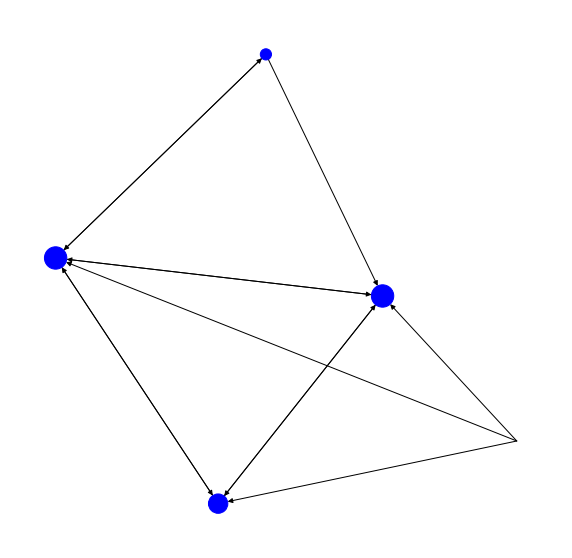

In [3]:
# Import required libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load camera trap data
cam_trap_data = pd.read_csv("/content/cam_data.csv")

# Identify individual animals
individuals = cam_trap_data['animal_id'].unique()

# Create an empty graph
network = nx.DiGraph()

# Loop through each row of the camera trap data
for i in range(cam_trap_data.shape[0]):
    # Identify the source and target animals
    source = individuals.tolist().index(cam_trap_data.iloc[i]['animal_id'])
    target = individuals.tolist().index(cam_trap_data.iloc[i]['interaction_id'])
    
    # Add an edge to the graph
    if network.has_edge(source, target):
        network[source][target]['weight'] += 1
    else:
        network.add_edge(source, target, weight=1)

# Calculate network metrics
centrality = nx.in_degree_centrality(network)
closeness = nx.closeness_centrality(network)
betweenness = nx.betweenness_centrality(network)

# Plot the network
plt.figure(figsize=(10, 10))
nx.draw_networkx(network, pos=nx.spring_layout(network),
                 node_size=[centrality[i] * 500 for i in range(len(individuals))], 
                 node_color='b', edge_color='k', with_labels=False)
plt.axis('off')
plt.show()


Number of nodes (animals): 5
Number of edges (interactions): 10
Density of the network: 1.0


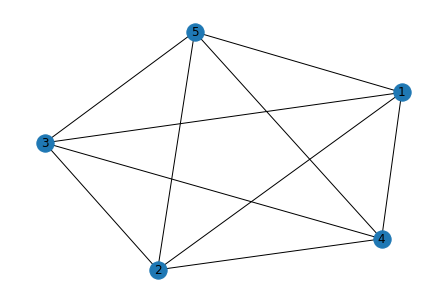

In [4]:
import pandas as pd
import networkx as nx

# Load the camera trap data
df = pd.read_csv('cam_data.csv')

# Create a graph
G = nx.Graph()

# Add nodes (animals)
G.add_nodes_from(df['animal_id'].unique())

# Add edges (interactions)
for i, row_i in df.iterrows():
    for j, row_j in df.iterrows():
        if row_i['animal_id'] != row_j['animal_id']:
            if row_i['interaction_id'] == row_j['interaction_id']:
                G.add_edge(row_i['animal_id'], row_j['animal_id'])
                   
# Print some basic network statistics
print('Number of nodes (animals):', G.number_of_nodes())
print('Number of edges (interactions):', G.number_of_edges())
print('Density of the network:', nx.density(G))

# Draw the network
nx.draw(G, with_labels=True)


Number of nodes (animals): 5
Number of edges (interactions): 10
Density of the network: 1.0


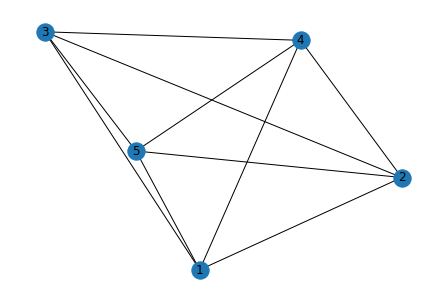

In [25]:
import pandas as pd
import networkx as nx

# Load the camera trap data
df = pd.read_csv('cam_data.csv')

# Create a graph
G = nx.Graph()

# Add nodes (animals)
G.add_nodes_from(df['animal_id'].unique())

# Add edges (interactions)
for i, row_i in df.iterrows():
    for j, row_j in df.iterrows():
        if row_i['animal_id'] != row_j['animal_id']:
            if row_i['interaction_id'] == row_j['interaction_id']:
                if G.has_edge(row_i['animal_id'], row_j['animal_id']):
                    G[row_i['animal_id']][row_j['animal_id']]['weight'] += 1
                else:
                    G.add_edge(row_i['animal_id'], row_j['animal_id'], weight=1)

# Print some basic network statistics
print('Number of nodes (animals):', G.number_of_nodes())
print('Number of edges (interactions):', G.number_of_edges())
print('Density of the network:', nx.density(G))

# Draw the network
nx.draw(G, with_labels=True)


In [ ]:
import pandas as pd
import networkx as nx
from sklearn.decomposition import PCA

# Load the camera trap data
df = pd.read_csv('camera_trap_data.csv')

# Perform PCA on the multivariate data
X = df[['species_richness', 'abundance', 'occurrence']].values
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a graph
G = nx.Graph()

# Add nodes (animals)
G.add_nodes_from(df['animal_id'].unique())

# Add edges (interactions)
for i, row_i in df.iterrows():
    for j, row_j in df.iterrows():
        if row_i['animal_id'] != row_j['animal_id']:
            if row_i['interaction_id'] == row_j['interaction_id']:
                G.add_edge(row_i['animal_id'], row_j['animal_id'])

# Set node attributes based on PCA scores
pca_dict = {animal_id: {'pca_1': score[0], 'pca_2': score[1]} for animal_id, score in zip(df['animal_id'], X_pca)}
nx.set_node_attributes(G, pca_dict)

# Print some basic network statistics
print('Number of nodes (animals):', G.number_of_nodes())
print('Number of edges (interactions):', G.number_of_edges())
print('Density of the network:', nx.density(G))

# Draw the network with node colors based on PCA scores
node_color = [score[0] for score in nx.get_node_attributes(G, 'pca_1').values()]
nx.draw(G, with_labels=True, node_color=node_color, cmap='coolwarm')


In [ ]:
# With environmental data 
import pandas as pd
import networkx as nx
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the camera trap and environmental data
df_camera = pd.read_csv('camera_trap_data.csv')
df_env = pd.read_csv('environmental_data.csv')

# Perform PCA on the multivariate environmental data
X_env = df_env[['temperature', 'humidity', 'precipitation']].values
pca_env = PCA(n_components=2)
X_env_pca = pca_env.fit_transform(X_env)

# Perform k-means clustering on the environmental data
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_env_pca)
labels = kmeans.predict(X_env_pca)

# Create a graph
G = nx.Graph()

# Add nodes (animals)
G.add_nodes_from(df_camera['animal_id'].unique())

# Add edges (interactions)
for i, row_i in df_camera.iterrows():
    for j, row_j in df_camera.iterrows():
        if row_i['animal_id'] != row_j['animal_id']:
            if row_i['interaction_id'] == row_j['interaction_id']:
                G.add_edge(row_i['animal_id'], row_j['animal_id'])

# Set node attributes based on PCA scores and environmental clusters
pca_dict = {animal_id: {'pca_1': score[0], 'pca_2': score[1]} for animal_id, score in zip(df_camera['animal_id'], X_pca)}
nx.set_node_attributes(G, pca_dict)

cluster_dict = {animal_id: {'cluster': cluster} for animal_id, cluster in zip(df_camera['animal_id'], labels)}
nx.set_node_attributes(G, cluster_dict)

# Print some basic network statistics
print('Number of nodes (animals):', G.number_of_nodes())
print('Number of edges (interactions):', G.number_of_edges())
print('Density of the network:', nx.density(G))

# Draw the network with node colors based on environmental clusters
node_color = [cluster for cluster in nx.get_node_attributes(G, 'cluster').values()]
nx.draw(G, with_labels=True, node_color=node_color, cmap='coolwarm')
